## 2.0  Analysis of Applications Train and Test Datasets - Integer Types
> - In this notebook I analyze and summarize the `application_train`and `application_test` datasets' integer or `int64`types.
> The datasets have three types: `float64`, `int64`, and `object`.The `float64` and `object` types are analyzed in a different notebook.

> - To more efficiently analyze both datasets I combined them into one dataframe and added a filter to later separate them.The `application_train`and `application_test` datasets includes all the same fields except the target variable.

> - The main objective in this notebook is to gain an understanding of the datasets using descriptive statistics and data visualizations.  After reviewing these statistics and data visualizations I will decide which fields should be included as features.  I also perform transformations on fields as deemed necessary. 

#### Analysis Summary:
> After analyzing the integer fields types I decided to include only fields where the top value makes up less than 97% of the total.

In [1]:
#import helper ultility module
%load_ext autoreload
%aimport utils
%autoreload 1

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

%matplotlib inline

### 2.1 Import Datasets And Prepare ABT
> - Import the train and test datasets combined using a utility helper module.
> - Create Activity Base Table (ABT) to group the fields by type.

In [3]:
dataset_all = utils.get_application_df()
dataset_all.dtypes.value_counts()

float64    71
int64      35
object     17
dtype: int64

In [4]:
dataset_all.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DATASET
0,100002,1.00,Cash loans,M,N,Y,0.00,"202,500.00","406,597.50","24,700.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,train
1,100003,0.00,Cash loans,F,N,N,0.00,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,train
2,100004,0.00,Revolving loans,M,Y,Y,0.00,"67,500.00","135,000.00","6,750.00",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,train
3,100006,0.00,Cash loans,F,N,Y,0.00,"135,000.00","312,682.50","29,686.50",...,0,0,0,nan,nan,nan,nan,nan,nan,train
4,100007,0.00,Cash loans,M,N,Y,0.00,"121,500.00","513,000.00","21,865.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,train


In [5]:
abt_all = utils.ABT(dataset_all)
abt_all.info()

Column count: 123
--------------------
Row count: 356255
--------------------
Types:
--------------------
Type: float64 Count: 71
Type: int64 Count: 35
Type: object Count: 17


In [6]:
#exclude the ['SK_ID_CURR','TARGET','DATASET'] fields from the ABT
int_table = abt_all.int_table
print("Total int64 types: {}".format(len(int_table)))
int_table 

Total int64 types: 34


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
FLAG_MOBIL,1,356255,0,0.00,2,1,356253,1.00
FLAG_EMP_PHONE,2,356255,0,0.00,2,1,291594,0.82
FLAG_WORK_PHONE,3,356255,0,0.00,2,0,284969,0.80
FLAG_CONT_MOBILE,4,356255,0,0.00,2,1,355603,1.00
FLAG_PHONE,5,356255,0,0.00,2,0,256998,0.72
FLAG_EMAIL,6,356255,0,0.00,2,0,330885,0.93
REGION_RATING_CLIENT,7,356255,0,0.00,3,2,262340,0.74
REGION_RATING_CLIENT_W_CITY,8,356255,0,0.00,4,2,265260,0.74
REG_REGION_NOT_LIVE_REGION,9,356255,0,0.00,2,0,350680,0.98


In [7]:
# print description of each field in the integer ABT
field_table = utils.FieldsNames()
field_table.print('application_{train|test}.csv',int_table.index.values.tolist()) 

1) ['FLAG_MOBIL']: Did client provide mobile phone (1=YES, 0=NO)
----------------------------------------
2) ['FLAG_EMP_PHONE']: Did client provide work phone (1=YES, 0=NO)
----------------------------------------
3) ['FLAG_WORK_PHONE']: Did client provide home phone (1=YES, 0=NO)
----------------------------------------
4) ['FLAG_CONT_MOBILE']: Was mobile phone reachable (1=YES, 0=NO)
----------------------------------------
5) ['FLAG_PHONE']: Did client provide home phone (1=YES, 0=NO)
----------------------------------------
6) ['FLAG_EMAIL']: Did client provide email (1=YES, 0=NO)
----------------------------------------
7) ['REGION_RATING_CLIENT']: Our rating of the region where client lives (1,2,3)
----------------------------------------
8) ['REGION_RATING_CLIENT_W_CITY']: Our rating of the region where client lives with taking city into account (1,2,3)
----------------------------------------
9) ['REG_REGION_NOT_LIVE_REGION']: Flag if client's permanent address does not match c

### 2.2  Select Fields 
> Only select fields that where the top value makes up less than 97% of the total.

In [8]:
final_features = int_table[int_table['top_%'] < .97].index.values.tolist()
final_features

['FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']

### 2.3 Plot Bar Graph 
> - Plot the count of each value as a bar graph.


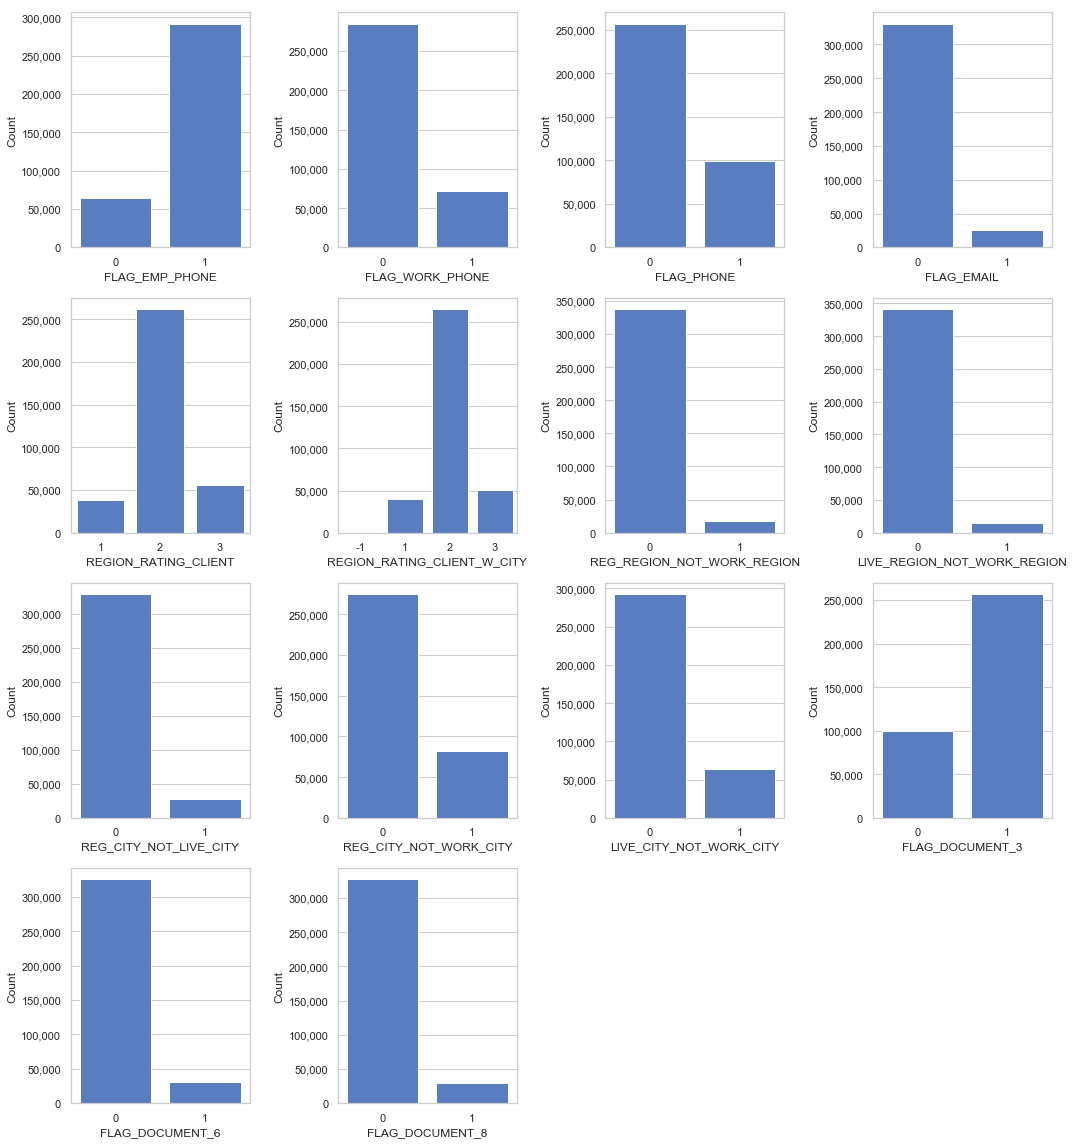

In [9]:
# let plot the first 14 fields
utils.plot_bar(final_features,dataset_all,w=15,h=4)

In [10]:
#the  REGION_RATING_CLIENT_W_CITY fields has one value with negative.  
# this appears to be an error so lets replace it with the median value.
dataset_all.groupby(['REGION_RATING_CLIENT_W_CITY']).size()

REGION_RATING_CLIENT_W_CITY
-1         1
 1     40342
 2    265260
 3     50652
dtype: int64

In [11]:
#replace negative value
dataset_all['REGION_RATING_CLIENT_W_CITY'] = dataset_all['REGION_RATING_CLIENT_W_CITY'].apply(lambda x: 2 if x < 0 else x)

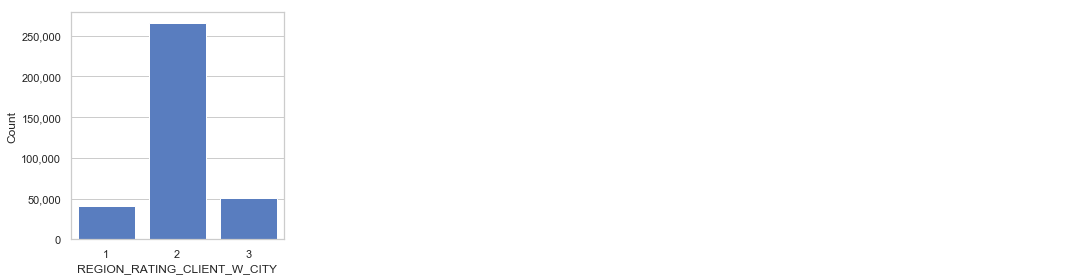

In [12]:
# let plot again
utils.plot_bar(['REGION_RATING_CLIENT_W_CITY'],dataset_all,w=15,h=4)

In [13]:
dataset_all.groupby(['REGION_RATING_CLIENT_W_CITY']).size()

REGION_RATING_CLIENT_W_CITY
1     40342
2    265261
3     50652
dtype: int64

### 2.4 Save Final Features To File

In [14]:
features =  ['SK_ID_CURR','TARGET','DATASET'] + final_features
dataset_all[features].to_csv('data_pre_processed/1_2_applications_integer_types.csv',index=False)